In [3]:
import requests

In [4]:
data = requests.get("http://api.open-notify.org/iss-now.json")

In [5]:
print(data)

<Response [200]>


In [6]:
data.json()

{'iss_position': {'longitude': '-57.8944', 'latitude': '45.5536'},
 'message': 'success',
 'timestamp': 1655212452}

In [7]:
type(data.json())

dict

In [8]:
data = data.json()

In [9]:
data

{'iss_position': {'longitude': '-57.8944', 'latitude': '45.5536'},
 'message': 'success',
 'timestamp': 1655212452}

In [10]:
data['message']

'success'

In [11]:
data['iss_position']['longitude']

'-57.8944'

In [1]:
import requests
## https://www.alphavantage.co/documentation/
data = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=EMG.LON&outputsize=full&apikey=6RP2CTVFUWTG2ZRE")

In [2]:
data= data.json()

In [3]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'EMG.LON',
  '3. Last Refreshed': '2022-06-16',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2022-06-16': {'1. open': '235.6000',
   '2. high': '238.2660',
   '3. low': '231.8000',
   '4. close': '234.0000',
   '5. volume': '4409304'},
  '2022-06-15': {'1. open': '242.7000',
   '2. high': '242.7000',
   '3. low': '236.8000',
   '4. close': '239.0000',
   '5. volume': '6359231'},
  '2022-06-14': {'1. open': '238.5000',
   '2. high': '240.7495',
   '3. low': '233.9000',
   '4. close': '236.7000',
   '5. volume': '4696691'},
  '2022-06-13': {'1. open': '242.7000',
   '2. high': '242.7000',
   '3. low': '236.5000',
   '4. close': '237.8000',
   '5. volume': '4850850'},
  '2022-06-10': {'1. open': '247.3000',
   '2. high': '249.6000',
   '3. low': '243.3000',
   '4. close': '243.3000',
   '5. volume': '3911900'},
  '2022-06-09': {'1. open': '247

In [4]:
data['Time Series (Daily)']

{'2022-06-16': {'1. open': '235.6000',
  '2. high': '238.2660',
  '3. low': '231.8000',
  '4. close': '234.0000',
  '5. volume': '4409304'},
 '2022-06-15': {'1. open': '242.7000',
  '2. high': '242.7000',
  '3. low': '236.8000',
  '4. close': '239.0000',
  '5. volume': '6359231'},
 '2022-06-14': {'1. open': '238.5000',
  '2. high': '240.7495',
  '3. low': '233.9000',
  '4. close': '236.7000',
  '5. volume': '4696691'},
 '2022-06-13': {'1. open': '242.7000',
  '2. high': '242.7000',
  '3. low': '236.5000',
  '4. close': '237.8000',
  '5. volume': '4850850'},
 '2022-06-10': {'1. open': '247.3000',
  '2. high': '249.6000',
  '3. low': '243.3000',
  '4. close': '243.3000',
  '5. volume': '3911900'},
 '2022-06-09': {'1. open': '247.7000',
  '2. high': '249.4000',
  '3. low': '246.4000',
  '4. close': '248.9000',
  '5. volume': '4231916'},
 '2022-06-08': {'1. open': '257.0000',
  '2. high': '257.0000',
  '3. low': '249.4000',
  '4. close': '249.7000',
  '5. volume': '5837557'},
 '2022-06-07'

In [5]:
ts_stock = data['Meta Data']['2. Symbol']

In [6]:
ts_stock

'EMG.LON'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
stock_name=[]
date_stamp=[]
close_price=[]

for x,y in data['Time Series (Daily)'].items():
    stock_name.append(ts_stock)
    date_stamp.append(datetime.strptime(x, '%Y-%m-%d'))
    close_price.append(float(y['4. close']))

In [9]:
data_pd = { "ticker": stock_name,
            "date_stamp": date_stamp,
            "close_price": close_price}

In [10]:
df = pd.DataFrame(data_pd)

In [11]:
print(df)

       ticker date_stamp  close_price
0     EMG.LON 2022-06-16     234.0000
1     EMG.LON 2022-06-15     239.0000
2     EMG.LON 2022-06-14     236.7000
3     EMG.LON 2022-06-13     237.8000
4     EMG.LON 2022-06-10     243.3000
...       ...        ...          ...
4405  EMG.LON 2005-01-10    1232.3068
4406  EMG.LON 2005-01-07    1240.9849
4407  EMG.LON 2005-01-06    1236.6459
4408  EMG.LON 2005-01-05    1240.1172
4409  EMG.LON 2005-01-04    1254.0023

[4410 rows x 3 columns]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ticker       4410 non-null   object        
 1   date_stamp   4410 non-null   datetime64[ns]
 2   close_price  4410 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 103.5+ KB


In [13]:
type(df['date_stamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
type(df['close_price'][0])

numpy.float64

In [15]:
df.sort_values(by=['date_stamp'], inplace=True, ascending=True)

In [16]:
df['MAV30'] = df['close_price'].rolling(30).mean()

In [17]:
df['SD30'] = df['close_price'].rolling(30).std()

In [18]:
df

,ticker,date_stamp,close_price,MAV30,SD30
4409,EMG.LON,2005-01-04,1254.0023,NaN,NaN
4408,EMG.LON,2005-01-05,1240.1172,NaN,NaN
4407,EMG.LON,2005-01-06,1236.6459,NaN,NaN
4406,EMG.LON,2005-01-07,1240.9849,NaN,NaN
4405,EMG.LON,2005-01-10,1232.3068,NaN,NaN
...,...,...,...,...,...
4,EMG.LON,2022-06-10,243.3000,242.453333,10.004990
3,EMG.LON,2022-06-13,237.8000,242.626667,9.872565
2,EMG.LON,2022-06-14,236.7000,242.750000,9.770743
1,EMG.LON,2022-06-15,239.0000,242.883333,9.688282


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 4409 to 0
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ticker       4410 non-null   object        
 1   date_stamp   4410 non-null   datetime64[ns]
 2   close_price  4410 non-null   float64       
 3   MAV30        4381 non-null   float64       
 4   SD30         4381 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 206.7+ KB


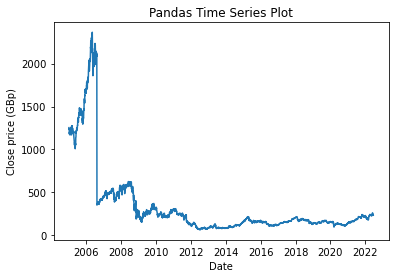

In [20]:
# Plot

x = df['date_stamp']
y1 = df['close_price']
y2 = df['MAV30']

# Labelling 

plt.xlabel("Date")
plt.ylabel("Close price (GBp)")
plt.title("Pandas Time Series Plot")

# Display
plt.plot(x,y1)
plt.show()

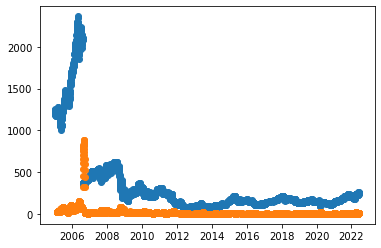

In [44]:
plt.plot_date(df['date_stamp'], df['close_price'], fmt='o')
plt.plot_date(df['date_stamp'], df['SD30'], fmt='o')
plt.plot_date(df['date_stamp'], df['MAV30'], fmt='o')